In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("HousingData.csv")
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# 1. Test for Multicollinearity

## Correlation matrix

<AxesSubplot:>

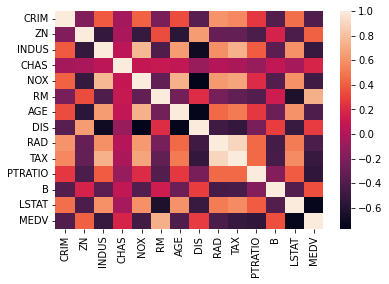

In [8]:
sns.heatmap(df.corr())

In [9]:
df['CRIM'].corr(df['ZN'])

-0.18807507071333482

In [10]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


## Scatterplot

sns.set_style(style='darkgrid')
sns.pairplot(df)

## Preparing a model

In [11]:
import statsmodels.formula.api as smf 
model = smf.ols('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=df).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     96.29
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          1.75e-111
Time:                        10:54:06   Log-Likelihood:                -1143.4
No. Observations:                 394   AIC:                             2315.
Df Residuals:                     380   BIC:                             2370.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.6801      5.681      5.752      0.000      21.509      43.851
CRIM          -0.0976      0.032     -3.007      0.003      -0.161      -0.034
ZN             0.0489      0.014      3.397      0.001       0.021       0.077
INDUS          0.0304      0.066      0.461      0.645      -0.099       0.160
CHAS           2.7694      0.925      2.993      0.003       0.950       4.588
NOX          -17.9690      4.243     -4.235      0.000     -26.311      -9.627
RM             4.2833      0.471      9.100      0.000       3.358       5.209
AGE           -0.0130      0.014     -0.898      0.370      -0.041       0.015
DIS           -1.4585      0.211     -6.912      0.000      -1.873      -1.044
RAD            0.2859      0.069      4.125      0.000       0.150       0.422
TAX           -0.0131      0.004     -3.324      0.001      -0.021      -0.005
PTRATIO       -0.9146      0.141     -6.506      0.000      -1.191      -0.638
B              0.0097      0.003      3.251      0.001       0.004       0.015
LSTAT         -0.4237      0.055     -7.700      0.000      -0.532      -0.315
==============================================================================
Omnibus:                      161.243   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              904.814
Skew:                           1.657   Prob(JB):                    3.33e-197
Kurtosis:                       9.643   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## VIF Values

In [13]:
rsq_hp = smf.ols('INDUS~NOX+DIS+TAX',data=df).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

In [14]:
vif_hp

3.295571192795917

In [15]:
rsq_hp = smf.ols('INDUS~NOX+DIS+TAX+AGE',data=df).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

In [16]:
vif_hp

3.323534136983672

In [17]:
rsq_hp = smf.ols('AGE~NOX+DIS',data=df).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 
vif_hp

2.6699866369679155

In [18]:
rsq_hp = smf.ols('NOX~DIS',data=df).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 
vif_hp

2.439227801625394

In [19]:
# As VIF Values are less we are not removing any features.

In [20]:
import statsmodels.formula.api as smf 
model = smf.ols('MEDV~CRIM+ZN+NOX+INDUS+CHAS+RM+DIS+AGE+TAX+RAD+PTRATIO+B+LSTAT',data=df).fit()

# 2. Residual vs Regressor

# 3. Test for Normality

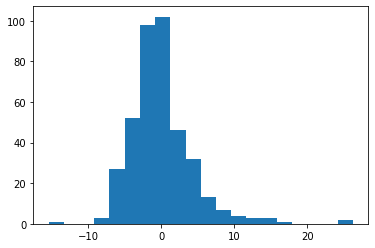

In [21]:
plt.hist(model.resid,bins=20)
plt.show()

In [22]:
# Normally distributed

# 4. Test for Homoscadasticity

In [23]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

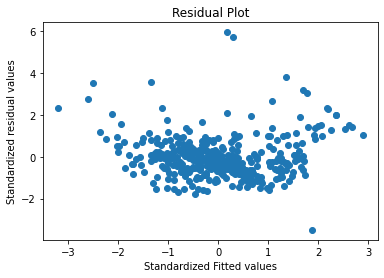

In [24]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# 

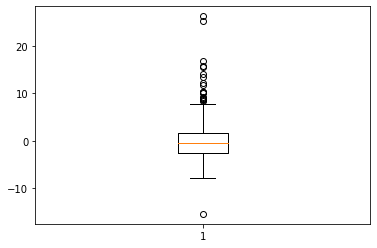

In [25]:
plt.boxplot(model.resid)
plt.show()

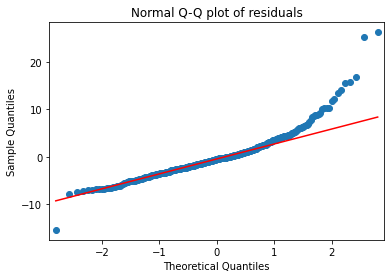

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

## Model deletion Diagnostic

## Deleting Influencer's Outliers

## Cook's Distance

In [27]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [28]:
df.shape

(394, 14)

In [29]:
K=13
N=394
3*(K+1)/N

0.1065989847715736

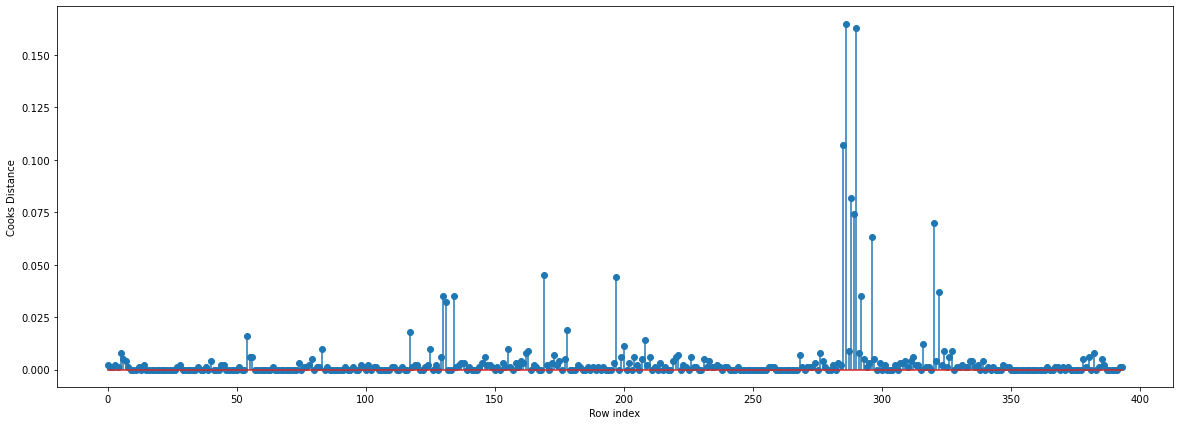

In [30]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
(np.argmax(c),np.max(c))

(286, 0.16518093110437562)

In [32]:
np.where(c>0.1065989847715736)

(array([285, 286, 290], dtype=int64),)

## Improving the Model

In [33]:
df_n=pd.read_csv("HousingData.csv")

In [34]:
df_n=df_n.dropna()

In [35]:
df_n=df_n.drop(df_n.index[[285,286,290]],axis=0).reset_index()

In [36]:
df_n=df_n.drop(['index'],axis=1)

In [37]:
df_n

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
387,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
388,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
389,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


## Build Model

In [38]:
f_model= smf.ols('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data = df_n).fit()

In [39]:
f_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     117.0
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          1.85e-123
Time:                        10:54:52   Log-Likelihood:                -1100.3
No. Observations:                 391   AIC:                             2229.
Df Residuals:                     377   BIC:                             2284.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.2364      5.452      3.896      0.000      10.517      31.956
CRIM          -0.0926      0.030     -3.112      0.002      -0.151      -0.034
ZN             0.0395      0.013      2.981      0.003       0.013       0.066
INDUS          0.0502      0.060      0.831      0.406      -0.069       0.169
CHAS           2.3518      0.877      2.683      0.008       0.628       4.075
NOX          -16.5737      3.900     -4.249      0.000     -24.243      -8.904
RM             5.6369      0.471     11.981      0.000       4.712       6.562
AGE           -0.0238      0.013     -1.784      0.075      -0.050       0.002
DIS           -1.3132      0.194     -6.767      0.000      -1.695      -0.932
RAD            0.2425      0.064      3.801      0.000       0.117       0.368
TAX           -0.0129      0.004     -3.550      0.000      -0.020      -0.006
PTRATIO       -0.8775      0.129     -6.783      0.000      -1.132      -0.623
B              0.0106      0.003      3.881      0.000       0.005       0.016
LSTAT         -0.3086      0.053     -5.815      0.000      -0.413      -0.204
==============================================================================
Omnibus:                      159.762   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              942.551
Skew:                           1.633   Prob(JB):                    2.13e-205
Kurtosis:                       9.870   Cond. No.                     1.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
f_model.predict(df_n[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]])

0      28.948062
1      24.732908
2      30.996795
3      28.870304
4      24.656093
         ...    
386    17.595500
387    20.145968
388    21.694937
389    27.397956
390    25.821478
Length: 391, dtype: float64